---

In [133]:
__authors__ = ["Tricia D Shepherd" , "Ryan C. Fortenberry", "Matthewy Kennedy", "C. David Sherril"]
__credits__ = ["Victor H. Chavez", "Lori Burns"]
__email__   = ["profshep@icloud.com", "r410@olemiss.edu"]

__copyright__ = "(c) 2008-2019, The Psi4Education Developers"
__license__   = "BSD-3-Clause"
__date__      = "2019-11-18"

---

## Introduction

The eigenfunctions solutions to the Schrödinger equation for a multielectron system depend on the coordinates of all electrons. The orbital approximation says that we can represent a many-electron eigenfunction in terms of individual electron orbitals, each of which depends only on the coordinates of a single electron. A *basis set* in this context is a set of *basis functions* used to approximate these orbitals. There are two general categories of basis sets: *minimal basis sets* that describe only occupied orbitals and *extended basis sets* that describe both occupied and unoccupied orbitals.

### Part A. What is the calculated Hartree Fock energy using a minimal basis set?

1. Import the required modules (**psi4** and **numpy**)

2. Define a Boron atom as a ```psi4.geometry``` object. Be mindful of the charge and spin multiplicity. For a neutral B atom, the atom can only be a doublet (1 unpaired electron). 

3. Set psi4 options to select an **unrestricted** calculation (restricted calculation *won't* work with this electronic configuration).

4. Run a **Hartree-Fock** calculation using the basis set **STO-3G**, store both the energy and the wavefunction object. The energy will be given in atomic units. 

5. Look at your results by printing them within a cell. It is possible to obtain information about the basis set from the wfn object. The number of basis functions can be accessed with: ```wfn.basiset().nbf()```

RESPONSE:

***
### Part B. How does the Hartree Fock energy depend on the trial basis set?

In computational chemistry, we focus on two types of functions: the Slater-type function and the Gaussian-type functions. Their most basic shape can be given by the following definitions. 

$$ \Phi_{gaussian}(r) = 1.0 \cdot e^{-1.0 \cdot x^2} $$

and

$$ \Phi_{slater}(r) = 1.0 \cdot e^{-1.0 \cdot |x|} $$


Both functions can be visualized below:

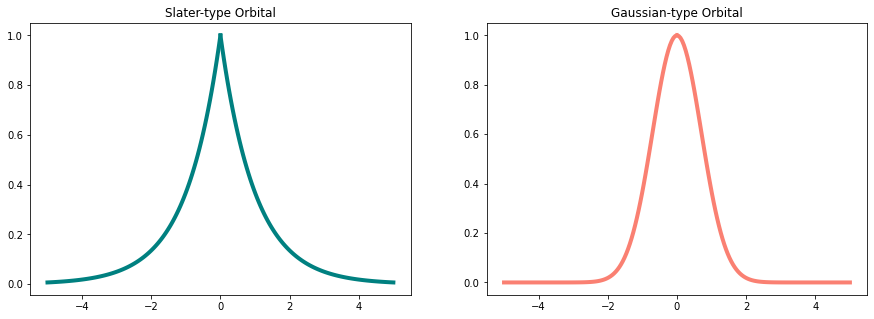

In [118]:
import matplotlib.pyplot as plt

r = np.linspace(0, 5, 100)
sto = 1.0 * np.exp(-np.abs(r))
gto = 1.0 * np.exp(-r**2)

fig, ax = plt.subplots(ncols=2, nrows=1)

p1 = ax[0]
p2 = ax[1]

fig.set_figheight(5)
fig.set_figwidth(15)


p1.plot(r, sto,  lw=4, color="teal")
p1.plot(-r, sto, lw=4, color="teal")

p2.plot(r,  gto, lw=4, color="salmon")
p2.plot(-r, gto, lw=4, color="salmon")


p1.title.set_text("Slater-type Orbital")
p2.title.set_text("Gaussian-type Orbital")

The STO is characterized by two features: 1) The peak at the nucleus and 2) the behavior far from the nucleus, which should tend to zero nice and smoothly. You can see that the GTO does not have those characteristics since the peak is smooth and the ends go to zero *too* quickly. 

You may remember that the ground state eigenfunction of the Hydrogen atom with a spin equal to zero has the same shape as the STO. This is true not only for Hydrogen but for every atomistic system. 
One may wonder then why are we not using STO in every calculation? The short answer is that we don't have the exact solution to each of the systems, and when it comes to handling approximations, the GTO are simply more efficient than the STO. Remember the theorem that states that the product of two Gaussians is also a Gaussian?



In the first part of the lab, we used the smallest basis set available STO-3G, where STO stands for *Slater-type orbital* which is approximated by the sum of *3 Gaussian functions*. 

$$\phi^{STO-3G} = \sum_i^3 d_i \cdot C(\alpha_i) \cdot e^{-\alpha_i|r-R_A|^2}  $$

Where the $\{ \alpha \}_i$ and $\{ d \}_i$ are the exponents and coefficients that define a basis set and are usually the components needed to create a basis set. 

STO-3G is an example of a minimal basis set, *i.e.* it represents the orbitals of each occupied subshell with one basis function. While basis sets of the form STO-nG were popular in the 1980's, they are not widely used today. For the same reason that multiple Gaussian functions better approximate a Slater type orbital, multiple STO-nG functions are found more efficient to approximate atomic orbitals. In practice, inner shell (core) electrons are still described by a single STO-nG function and only valence electrons are expressed as the sum of STO-nG type functions. 

You will see that the approximation performs really well. Look at the following example$^1$:

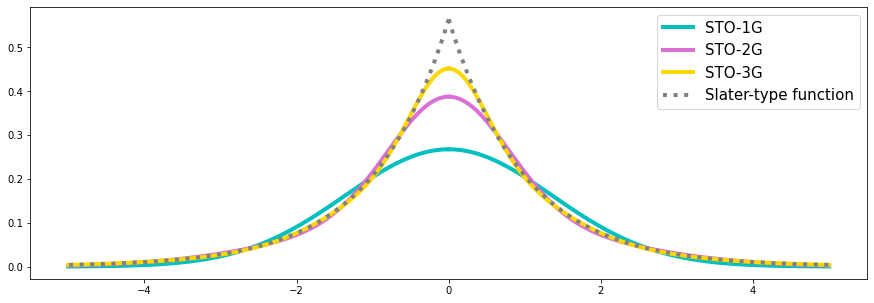

In [119]:
import matplotlib.pyplot as plt

def sto(r, coef, exp):
    return coef * (2*exp/np.pi)**(3/4) * np.exp(-exp*(r)**2)

slater = (1/np.pi)**(0.5) * np.exp(-1.0*np.abs(r))

sto_1g = sto(r, 1.00, 0.270950)
sto_2g = sto(r, 0.67, 0.151623) + sto(r, 0.43, 0.851819)
sto_3g = sto(r, 0.44, 0.109818) + sto(r, 0.53, 0.405771) + sto(r, 0.154, 2.22766)


plt.figure(figsize=(15,5))

plt.plot(r, sto_1g, lw=4, c="c")
plt.plot(-r, sto_1g, label="STO-1G", lw=4,  c="c")

plt.plot(r, sto_2g, lw=4, c="orchid")
plt.plot(-r, sto_2g, label="STO-2G", lw=4, c="orchid")

plt.plot(r, sto_3g, lw=4, c="gold" )
plt.plot(-r, sto_3g, label="STO-3G", lw=4,  c="gold" )

plt.plot(r, slater, ls=":", lw=4, c="grey")
plt.plot(-r, slater, label="Slater-type function", ls=":", lw=4, c="grey")

plt.legend(fontsize=15)
plt.show()

We can clearly see that with the addition of each new Gaussian, our linear combination behaves more and more like a STO. Each of these Gaussians is commonly knon as *primitive*. 

###### $^1$ Szabo, Attila, and Neil S. Ostlund. Modern quantum chemistry: introduction to advanced electronic structure theory. Courier Corporation, 2012.

___

To understand how to read each basis set, let's consider the next available basis set: 3-21G basis set. The number before the dash, "3" represents the 3 Gaussian primitives (i.e. a STO-"3"G) use to represent the inner shell electrons. The next two numbers represent the valence shell split into two sets of STO-nG functions--One with"2" Gaussian-type orbitals (GTOs) and one with "1" GTO. Let us see how this other basis set performs. 

1. With the previously defined Boron atom. Run a new HF calculation using the basis set "3-21G".

2. Rationalize the number of basis functions used for the STO-3G and 3-21G calculations. 

3. Compare the STO-3G and 3-21G HF energies. WHich basis set is more accurate? (Recall the variational principle states that for a given Hamiltonian operator, any trial wavefunction will have n average energy that is greater than or equal to the "true" corresponding ground state wavefunction. Because of this, the Hartree Fock energy is an upper bound to the ground state energy of a given molecule. )

RESPONSE:

***
### Part C. How can we improve the accuracy of the HF energy?

To make an even better approximation to our trial function, we may need to take into account the two following effects:

#### Polarization:
Accounts for the unequal distribution of electrons when two atoms approach each other. We can include these effects by adding STO's of higher orbital angular momentum, i.e., d-type functions are added to describe valence elctrons in 2p orbitals. 

We can if there is presence of polarization functions with the use of asterisks:

* One asterisk (*) refers to polarization on heavy atoms.
* Two asterkisks (**) is used for polarization on Hydrogen (H-Bonding).


#### Difusse Functions:
These are useful for systems in an excited state, systems with low ionization potential, and systems with some significant negative charge attached. 

The presence of diffuse functions is symbolized by the addition of a plus sign:

* One plus sign (+) adds diffuse functions on heavy atoms.
* Two plus signs (++) add diffuse functions on Hydrogen atoms.


***
Let us look at how the addition of these effects will improve our energy:

1. Repeat the boron atom energy calculation for each of the basis sets listed:  
    ``['6-31G', '6-31+G', '6-31G*', '6-31+G*', '6-311G*', '6-311+G**', 'cc-pVDZ', 'cc-pVTZ']``
    
2. Using `print(f"")` statements, builld a table where for each basis you identify the type and number of STO-nG function used for the core and valence electrons. 
3. For each basis, identify the type and number of STO-nG functions used for the core and valence electrons. 
4. On the same table, specify wether polarized or difusse functions are included. 
5. Record the total number of orbitals. For the Boron atom, which approximation (choice of basis set) is the most accurate? How does the accuracy relate to the number of basis functions used?

    

RESPONSE:

***

### Part D. How much "correlation energy" can we recover

At the Hartree Fock level of theory, each electron experiences an average potential field of all the other electrons. In essence, it is a "mean field" approach that neglects individual electron-electron interactions or "electron correlation". Thus, we define t he difference between the self-consistent field energy and the exact energy as the correlation energy. Two fundamentally different approaches to account for electron correlation effects are available by selecting a Correlation method: Moller Plesset (MP) Perturbation theory and Coupled Cluster (CC) theory. 

1. Based on the calculated SCF energy for the *6-311+G** basis set, determine the value of the correlation energy for boron assuming an "experimental" energy of **-24.608 hartrees$^2$**

2. Using the same basis set, perform an energy calculation with MP2 and MP4.  
   (You may recover the MP2 energy from the MP4 calculation but you will have to look at the output file).  
   MP4 will require the use of the following options:
   ```psi4.set_options({"reference" :"rohf", "qc_module":"detci"})```

3. Using the same basis set, perform an energy calculation with CCSD and CCSD(T).   
   (You may recover the CCSD energy from the CCSD(T) calculation but you will have to look at the output file).  

4. For each method, determine the percentage of the correlation energy recovered. 

<br />


###### $^2$. H. S. Schaefer and F. Harris, (1968) Phys Rev. 167, 67

RESPONSE:

***

### Part E. Can we use DFT(B3LYP) to calculate the electron affinity of boron?

The electron affinity of atom A is the energy released for the process:
    
$$ A + e^{-} \rightarrow A^{-} $$

Or simply the energy difference between the anion and the neutral forms of an atom. These are reported in positive values:
    
$$ EA = - (E_{anion} - E_{neutral}) $$

It was reported$^3$ that the electron affinity of Boron at the B3LYP 6-311+G** level of theory is **-0.36 eV**. In comparison to the experimental value of **0.28 eV** this led to the assumption that B3LYP does not yield a reasonable electron affinity. 
|


1. Define a Boron atom for two different configurations:
    For the anion, set the charge to **-1**. Once we do that, the charge and spin multiplicity are no longer compatible. For 2 electrons in a set of *p* orbitals, the multiplicity can only be 3 (triplet state, unpaired spins) or 1 (singlet state, paired spins). Here, by Hund's rules, we expect the spins will remain unpaired, leading to a triplet. Run the calculation and record the energy for boron anion. 
    
2. Calculate the electron affinity. Is this literature result consistent with your calculation? (Remember 1 hartree = 27.2116 eV)

3. Repeat the electron affinity calculation of boron, but this time, assume the anion is a singlet sate. Whata is the reason$^4$ for the reporte failure of the B3LYP method?

<br/>

###### $^3$C. W. Bauschlicher, (1998) Int. J. Quantum Chem. 66, 285
######  $^4$  B. S. Jursic, (1997) Int. J. Quantum Chem. 61, 93

RESPONSE: